<a href="https://colab.research.google.com/github/wasxy47/NLP_Tasks_Beginner/blob/main/Task_02_News_Category_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: News Category Classification**


### **Description:**


*   Dataset (Recommended): AG News (Kaggle)
*   Classify news articles into categories such as sports, business, politics, technology, etc

*   Perform standard text preprocessing (tokenization, stopword removal, lemmatization)
*   Vectorize the text using TF-IDF or word embeddings
Train a multiclass classifier (e.g., Logistic Regression, Random Forest, or SVM)


### **Tools & Libraries:**
Pandas

Scikit-learn

Optionally: XGBoost or LightGBM

### **Covered Topics**
Multiclass classification | Text preprocessing |
Feature engineering with text

### **Bonus:**
Visualize the most frequent words per category using bar plots or word clouds
Try training the model using a neural network (e.g., simple feedforward NN with Keras)

In [1]:
!pip install pandas scikit-learn matplotlib seaborn wordcloud nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


In [10]:
from google.colab import files
uploaded = files.upload()

Saving archive (2).zip to archive (2).zip


In [11]:
from zipfile import ZipFile

with ZipFile('/content/archive (2).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/ag_news')


**Note:** It appears the zip file was corrupted or not a valid zip file. The following cell will download the dataset directly using the Kaggle API. You will need to upload your `kaggle.json` file to your Colab environment to use this.

In [12]:
df = pd.read_csv('/content/ag_news/train.csv', header=None)
df.columns = ['label', 'title', 'description']
df = df.iloc[1:] # Remove the header row
display(df.head())

,label,title,description
1,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
2,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
3,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
4,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
5,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [13]:
df['text'] = df['title'] + " " + df['description']
df = df[['text', 'label']]

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # keep only letters
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

In [16]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.90925

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.90      0.91      5956
           2       0.95      0.98      0.96      6058
           3       0.87      0.88      0.87      5911
           4       0.89      0.88      0.89      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



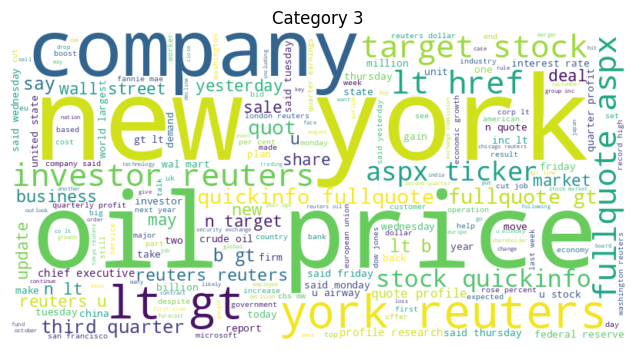

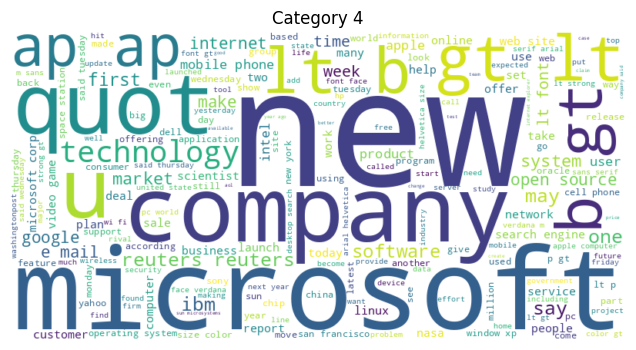

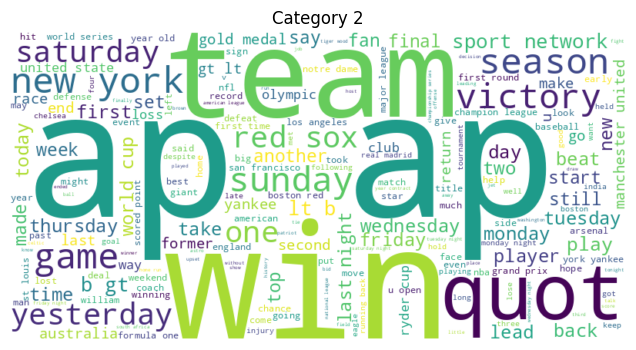

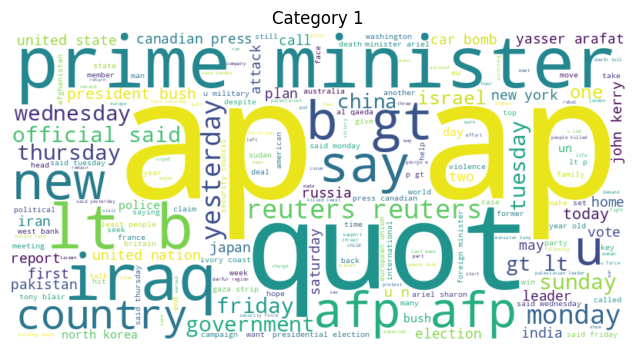

In [19]:
for cat in df['label'].unique():
    text = ' '.join(df[df['label'] == cat]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Category {cat}")
    plt.show()

In [20]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical (one-hot encoding)
num_classes = df['label'].nunique()
y_train_cat = to_categorical(y_train.astype(int) - 1, num_classes)  # labels start from 1, so subtract 1 and convert to int
y_test_cat = to_categorical(y_test.astype(int) - 1, num_classes)

# Build a simple neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_tfidf.toarray(), y_train_cat,
    epochs=5, batch_size=128,
    validation_data=(X_test_tfidf.toarray(), y_test_cat)
)

# Evaluate
loss, accuracy = model.evaluate(X_test_tfidf.toarray(), y_test_cat)
print(f"Neural Net Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
390/750 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.7376 - loss: 0.7451